In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# DataSet and Feauters Descreption
Dataset contains information about property sales in Melbourne during the period from January, 2016 to October, 2018.
let's read the data :


In [5]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv",parse_dates=['Date'])
data.head()

<ipython-input-5-e87700422b86>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv",parse_dates=['Date'])


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Every row  is a sold of property with its own characteristics and additional information as seller, sell type and sell.

let's get the information apout the data


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

as we see , the data contains 21 featuers and many of them have NULL values

**1.1 Features description**

Let's give a more detailed description about columns meaning:

-Suburb: Suburb name in Melbourne

-Address: Address

-Rooms: Number of rooms


-Bedroom2: Number of rooms (from different source)

-Price: Price in Australian dollars. It's a target value in our task

-Method - type of sales method:

S - property sold;

SP - property sold prior;

PI - property passed in;

PN - sold prior not disclosed;

SN - sold not disclosed;

VB - vendor bid;

W - withdrawn prior to auction;

SA - sold after auction;

SS - sold after auction price not disclosed.

-Type - type of property:

h - house, cottage, villa, semi, terrace;

u - unit, duplex;

t - townhouse;

-SellerG: Real Estate Agent

-Date: Date sold

-Distance: Distance from C.B.D.(Melbourne centre) in Kilometres

-Regionname: General Region (West, North West, North, North east ...etc.)

-Propertycount: Number of properties that exist in the suburb.

-Bathroom: Number of Bathrooms

-Car: Number of carspots

-Landsize: Land size in Metres

-BuildingArea: Building size in Metres

-YearBuilt: Year the house was built

-CouncilArea: Governing council for the area

-Lattitude: Lattitude coordinate of property

-Longtitude: Longtitude coordinate of property

# EDA :


1.   Target value analysis:

First,save the target in a separate variable and plot it to see if it belongs to a normal distribution or not.



In [ ]:
y = data[data['Price'].notnull()]['Price']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


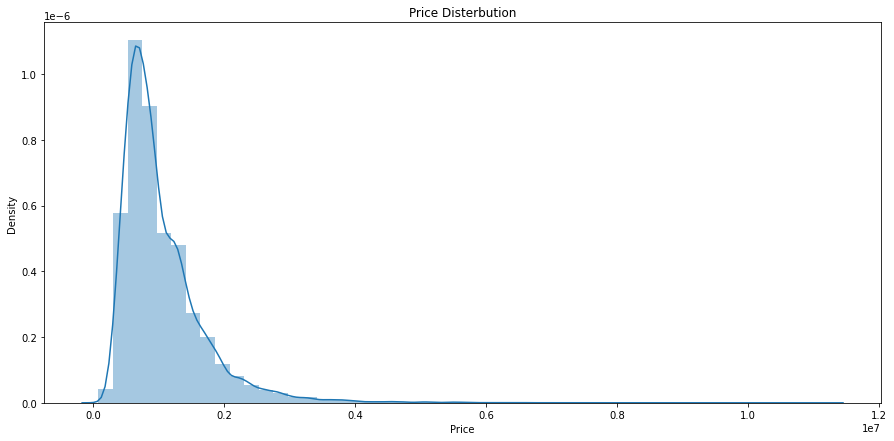

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.figure(figsize=(15,7))
sns.distplot(y)
plt.title("Price Disterbution")
plt.show()

As we can see, the target does not belong to a normal distribution and it is not a correct decision to make a prediction based on it

so,let's try a small trick here

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


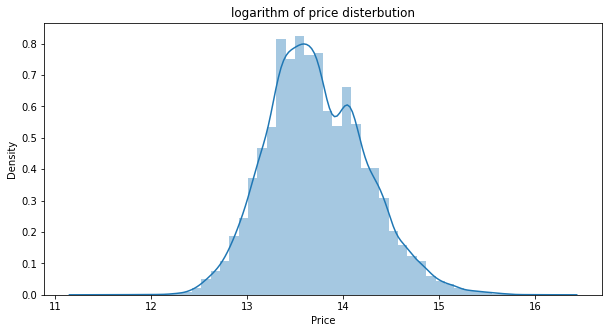

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(y))
plt.title("logarithm of price disterbution")
plt.show()

In [ ]:
from scipy.stats import kstest, probplot, skew
testState , pValue = kstest(np.log(y),cdf='norm')
testState,pValue

(1.0, 0.0)

In [ ]:
skew(np.log(y)),skew(y)

(0.3358878858562303, 2.588826811108291)

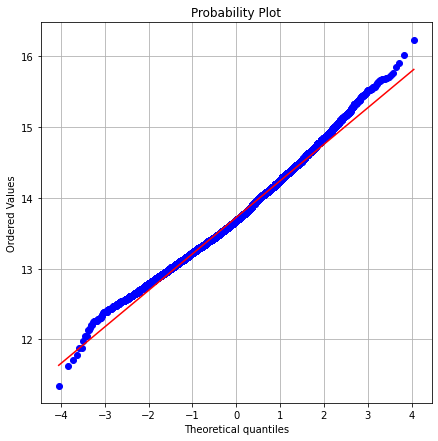

In [ ]:
plt.figure(figsize=(7,7))
probplot(np.log(y), dist='norm', plot=plt);
plt.grid()

The trick works so well that the target belongs to a normal distribution and the skewness value is 0.33
It was 2.5

but now we shall work with the target value as the follow :


*   Train models on transform target  y=log(y)

*    Make a prediction as  y^

*   Perform the inverse transform to original target : y=e^y
*   Check their quality by calculating some metric







2.   Missing Value Processing :

there is a lot of missing values,let's try to fill them.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [ ]:
#start with POSTCODE featuers
data[data.Postcode.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop that instance (it has alot of nan values)
data=data[~data.Postcode.isnull()]
data['Postcode']=data['Postcode'].astype(int)

In [ ]:
#now check Regionname
data[data.Regionname.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop this tow instance too.
data=data[~data['Regionname'].isnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34854 non-null  object        
 1   Address        34854 non-null  object        
 2   Rooms          34854 non-null  int64         
 3   Type           34854 non-null  object        
 4   Price          27244 non-null  float64       
 5   Method         34854 non-null  object        
 6   SellerG        34854 non-null  object        
 7   Date           34854 non-null  datetime64[ns]
 8   Distance       34854 non-null  float64       
 9   Postcode       34854 non-null  int64         
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [ ]:
#there are a lot of Lattitude and Longtitude missing values
coordinatesCol=['Address', 'Regionname', 'Suburb', 'CouncilArea', 'Lattitude', 'Longtitude']
coordinatesData = data[~((data.Longtitude.isnull()) & (data.Lattitude.isnull()))][coordinatesCol]
coordinatesData.shape

(26881, 6)

In [ ]:
groupFeatuers = ['Regionname','Suburb','CouncilArea']
GroupedCooData = coordinatesData.groupby(groupFeatuers)['Longtitude','Lattitude'].mean().reset_index().rename(columns={'Longtitude':'newLon','Lattitude':'newLatt'})
GroupedCooData.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(345, 5)

Average values ​​for both latitude and longitude were calculated based on the features of the area

i think the ADRESS featuer aple to split into tow seperate featuers (huose number , street name) This seperate may be useful.


In [ ]:
#let's fill  nan values (longtitude,lattitude)
#first merge the GroupedCooData with the orginal data
data = pd.merge(data, GroupedCooData, on=groupFeatuers, how='left')
#now we can fill nan values of (longtitude,lattitude) with the new ones.
data.loc[data.Lattitude.isnull(),'Lattitude'] = data['newLatt']
data.loc[data.Longtitude.isnull(),'Longtitude'] = data['newLon']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34853
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34854 non-null  object        
 1   Address        34854 non-null  object        
 2   Rooms          34854 non-null  int64         
 3   Type           34854 non-null  object        
 4   Price          27244 non-null  float64       
 5   Method         34854 non-null  object        
 6   SellerG        34854 non-null  object        
 7   Date           34854 non-null  datetime64[ns]
 8   Distance       34854 non-null  float64       
 9   Postcode       34854 non-null  int64         
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [ ]:
#let's seperate ADRESS featuer
data['Address']=data.Address.str.split(' ')
data['Street'] = data.Address.apply(lambda s: s[1])
data['HouseNumber'] = data.Address.apply(lambda s: s[0])
#now we can drop all useless columns
uselessCol = ['Address','newLon','newLatt']
data.drop(uselessCol,axis=1,inplace=True)

In [ ]:
#check value_counts of nan's in Longtitude and Lattitude
data[data.Longtitude.isnull()].shape[0],data[data.Lattitude.isnull()].shape[0]

(87, 87)

there is a little bit nan's , we can simply fill them with midean(there is a missing values in the area featuers too.)

In [ ]:
data['Longtitude']=data['Longtitude'].fillna(data.Longtitude.mean())
data['Lattitude']=data['Lattitude'].fillna(data.Lattitude.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34853
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34854 non-null  object        
 1   Rooms          34854 non-null  int64         
 2   Type           34854 non-null  object        
 3   Price          27244 non-null  float64       
 4   Method         34854 non-null  object        
 5   SellerG        34854 non-null  object        
 6   Date           34854 non-null  datetime64[ns]
 7   Distance       34854 non-null  float64       
 8   Postcode       34854 non-null  int64         
 9   Bedroom2       26640 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

So, we have missings in features: **Bedroom2, Bathroom, Car, Landsize, BuildingArea**

In [ ]:
data['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

more than 7 bathroom in one house XD

In [ ]:
data[data.Bathroom>=8]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Street,HouseNumber
2536,Burwood,3,h,NaN,PI,Ross,2016-08-10,11.7,3125,30.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0,Cumming,36
8251,Preston,4,h,760000.0,PI,Barry,2016-05-22,8.8,3072,9.0,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0,Murray,421
17472,Camberwell,8,h,2200000.0,PI,Ross,2017-08-07,7.7,3124,8.0,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0,Toorak,1088
25716,Burwood,10,h,2315000.0,SP,Buxton,2017-10-28,10.4,3125,10.0,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0,Elgar,79
26209,Mitcham,16,h,5000000.0,S,Buxton,2017-10-28,17.2,3132,16.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0,Harrison,20


There are some contradictory values in the first instance there is 3 room but the house has 30 bed room and 12 bathroom ...etc
it's better to drop these rows (outlayers) These values ​​flop prediction



In [ ]:
#drop all row that have more than 8 bedrooms and 6 bathrooms
data = data[(data['Bathroom'].isnull())|(data['Bathroom']<=6)]
data = data[(data['Bedroom2'].isnull())|(data['Bedroom2']<=8)]

In [ ]:
data['Bedroom2'].value_counts()

3.0    11881
4.0     6348
2.0     5777
5.0     1425
1.0      966
6.0      168
7.0       29
0.0       17
8.0       12
Name: Bedroom2, dtype: int64

In [ ]:
# there is houese without bedrooms ,let's check them
data[data['Bedroom2']==0]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Street,HouseNumber
218,Alphington,2,t,650000.0,SP,Brace,2016-09-24,6.4,3078,0.0,1.0,0.0,0.0,NaN,NaN,Darebin City Council,-37.78480,145.02500,Northern Metropolitan,2211.0,Chandler,7/7
1390,Bentleigh East,3,t,830000.0,PI,Buxton,2016-04-06,13.9,3165,0.0,2.0,2.0,292.0,141.0,2012.0,Glen Eira City Council,-37.91680,145.06900,Southern Metropolitan,10969.0,Edinburgh,17a
1424,Bentleigh East,3,h,1355000.0,S,Buxton,2016-08-10,13.9,3165,0.0,1.0,2.0,818.0,NaN,NaN,Glen Eira City Council,-37.92410,145.05390,Southern Metropolitan,10969.0,Wallace,7
1549,Bentleigh East,3,h,700000.0,S,Thomson,2016-05-22,13.9,3165,0.0,0.0,0.0,456.0,NaN,NaN,Glen Eira City Council,-37.93140,145.08080,Southern Metropolitan,10969.0,Warrigal,579
3717,Eaglemont,3,t,NaN,SN,Miles,2016-08-10,10.3,3084,0.0,0.0,0.0,0.0,NaN,NaN,Banyule City Council,-37.75940,145.05420,Eastern Metropolitan,1651.0,Waldemar,3/43
3812,Elsternwick,2,u,410000.0,VB,Gary,2016-05-28,8.5,3185,0.0,0.0,0.0,0.0,NaN,NaN,Glen Eira City Council,-37.88630,144.99960,Southern Metropolitan,4898.0,Nepean,5/29
5547,Ivanhoe,4,h,2400000.0,S,Jellis,2016-04-06,7.9,3079,0.0,2.0,2.0,1252.0,201.0,1920.0,Banyule City Council,-37.77270,145.04840,Eastern Metropolitan,5549.0,Locksley,20
10107,Surrey Hills,3,h,1560000.0,S,hockingstuart,2016-09-24,11.2,3127,0.0,2.0,1.0,335.0,209.0,2013.0,Boroondara City Council,-37.81650,145.09810,Southern Metropolitan,5457.0,Scheele,14
11193,East Melbourne,2,u,872000.0,S,Dingle,2016-05-28,1.5,3002,0.0,0.0,0.0,0.0,NaN,NaN,Melbourne City Council,-37.81540,144.98510,Northern Metropolitan,3040.0,Powlett,9/35
11234,Fawkner,3,h,585000.0,S,hockingstuart,2016-06-08,12.4,3060,0.0,1.0,1.0,605.0,103.0,1960.0,Hume City Council,-37.69850,144.96150,Northern Metropolitan,5070.0,Lord,4


wrong values again , some instance has 0 bedrooms and 0 bathrooms but the land size and price are really high .. how is that possible

DROP

In [ ]:
data=data[~(data['Bedroom2']==0)]
data['Bedroom2'].value_counts()

3.0    11881
4.0     6348
2.0     5777
5.0     1425
1.0      966
6.0      168
7.0       29
8.0       12
Name: Bedroom2, dtype: int64

In [ ]:
#car spot
data['Car'].value_counts()

2.0     12203
1.0      9160
0.0      1621
3.0      1605
4.0      1159
5.0       150
6.0       139
7.0        22
8.0        22
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

In [ ]:
#check car spot greater than 8 
data[data['Car']>=8]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Street,HouseNumber
805,Avondale Heights,3,h,850000.0,SP,Moonee,2017-02-25,10.5,3034,3.0,2.0,8.0,585.0,NaN,NaN,Moonee Valley City Council,-37.75100,144.85710,Western Metropolitan,4502.0,South,11
4324,Fitzroy North,5,h,NaN,S,Collins,2016-08-28,3.5,3068,4.0,2.0,11.0,1010.0,440.0,NaN,Moreland City Council,-37.78710,144.99250,Northern Metropolitan,6244.0,Queens,416
4891,Glenroy,4,h,1000000.0,PI,Barry,2016-11-27,13.0,3046,4.0,2.0,8.0,977.0,304.0,1935.0,Moreland City Council,-37.70630,144.92730,Northern Metropolitan,8870.0,Glenroy,107
6017,Kew,2,h,NaN,S,Kay,2016-09-24,5.6,3101,2.0,2.0,26.0,267.0,500.0,2011.0,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,Duke,25
6589,Maribyrnong,4,h,1900000.0,VB,Nelson,2016-09-17,8.7,3032,4.0,3.0,8.0,865.0,374.0,2013.0,Maribyrnong City Council,-37.76820,144.89710,Western Metropolitan,4918.0,Newstead,12
7451,Northcote,4,h,3850000.0,PI,Jellis,2016-07-30,5.5,3070,4.0,4.0,8.0,1390.0,NaN,1912.0,Darebin City Council,-37.77670,144.99960,Northern Metropolitan,11364.0,Clarke,215
7454,Northcote,3,h,1500000.0,PI,Jellis,2016-07-30,5.5,3070,4.0,1.0,8.0,727.0,NaN,1900.0,Darebin City Council,-37.78250,145.00720,Northern Metropolitan,11364.0,Westgarth,118
13335,Northcote,4,h,1822000.0,S,Nelson,2017-05-13,5.5,3070,4.0,1.0,8.0,728.0,NaN,1900.0,Darebin City Council,-37.78250,145.00720,Northern Metropolitan,11364.0,Westgarth,118
14651,Surrey Hills,3,h,2100000.0,VB,Jellis,2017-01-07,10.2,3127,3.0,1.0,9.0,841.0,124.0,1960.0,Boroondara City Council,-37.83729,145.10929,Southern Metropolitan,5457.0,Riversdale,1093
15449,Bayswater,4,h,925000.0,SP,Biggin,2017-06-17,23.2,3153,4.0,1.0,10.0,993.0,128.0,1966.0,Knox City Council,-37.84688,145.25632,Eastern Metropolitan,5030.0,Orange,95


there is something wrong here,some houses has alot of car spot and small land size,let's plot for more details

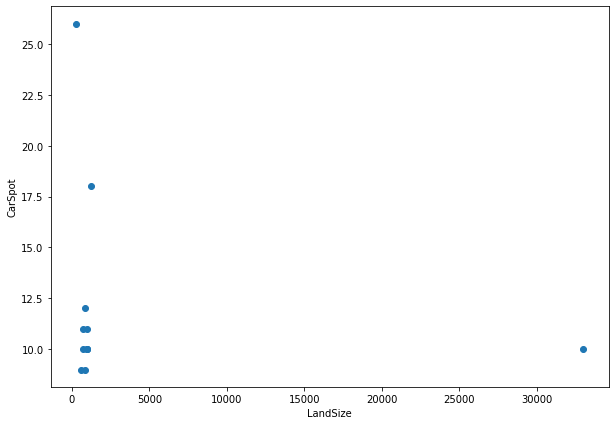

In [ ]:
ind=data[data['Car']>8].index
LS = data.loc[ind,'Landsize']
Car=data[data['Car']>8]['Car']
plt.figure(figsize=(10,7))
plt.xlabel("LandSize")
plt.ylabel("CarSpot")
plt.scatter(LS,Car)
plt.show()

A big difference between the land area and the number of car garages for some values ​​and vice versa
DROP all car spot greater than 8


In [ ]:
data  =  data[(data['Car'].isnull()) | (data['Car']<8)]
data['Car'].value_counts()

2.0    12203
1.0     9160
0.0     1621
3.0     1605
4.0     1159
5.0      150
6.0      139
7.0       22
Name: Car, dtype: int64

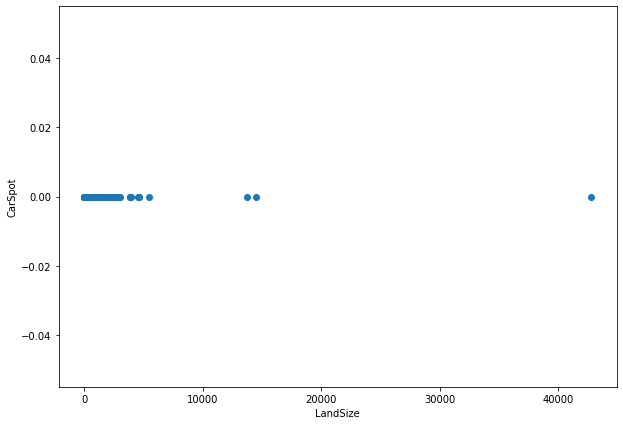

In [ ]:
ind=data[data['Car']==0].index
LS = data.loc[ind,'Landsize']
Car=data[data['Car']==0]['Car']
plt.figure(figsize=(10,7))
plt.xlabel("LandSize")
plt.ylabel("CarSpot")
plt.scatter(LS,Car)
plt.show()

In [ ]:
testData=data[data['Car']==0][['Price','Rooms','Landsize']]
testData[testData['Landsize']>10000]

,Price,Rooms,Landsize
9200,315000.0,1,14500.0
14663,NaN,2,13733.0
34052,865000.0,4,42800.0


very big land size with few rooms and too expensive (i think it's farm :D)

Before we judge them let's check Landsize featuers


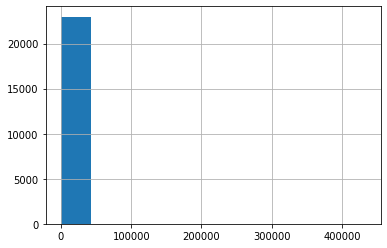

In [ ]:
data['Landsize'].hist()

So, distribution is very skewed, because of outliers with very huge values. Let's find **mean value** and calculate **97% quantile for Landsize** feature. 

In [ ]:
mean = data['Landsize'].mean()
q_97 = data[~data['Landsize'].isnull()].Landsize.quantile(0.97)
print('LandSize MEAN : {0} \n Quantile 97% : {1}'.format(mean,q_97))

LandSize MEAN : 589.562622351764 
 Quantile 97% : 1220.0


the outlayer too huge according to the above values so let's just drop all values higher than the quantile

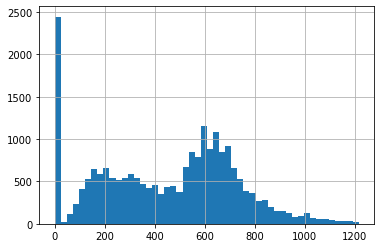

In [ ]:
data = data[(data['Landsize'].isnull()) | (data['Landsize'] < q_97)]
data[~data['Landsize'].isnull()].Landsize.hist(bins=50);

much better result

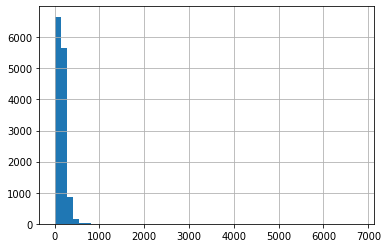

In [ ]:
#BuildingArea
data[~data['BuildingArea'].isnull()].BuildingArea.hist(bins=50)

the same situation as the Land size

In [ ]:
q_99 = data[~data['BuildingArea'].isnull()].BuildingArea.quantile(0.99)
q_99

465.0

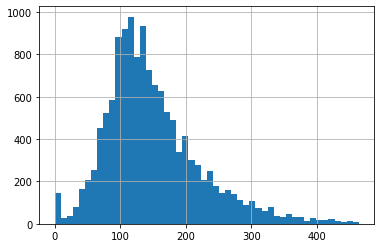

In [ ]:
data = data[(data['BuildingArea'].isnull()) | (data['BuildingArea'] < q_99)]
data[~data['BuildingArea'].isnull()].BuildingArea.hist(bins=50)

ok,good result but there is few 0 value the bulding area cant be 0,change it to nan to deal with it later

In [ ]:
data.loc[data['BuildingArea'] == 0, 'BuildingArea'] = np.nan

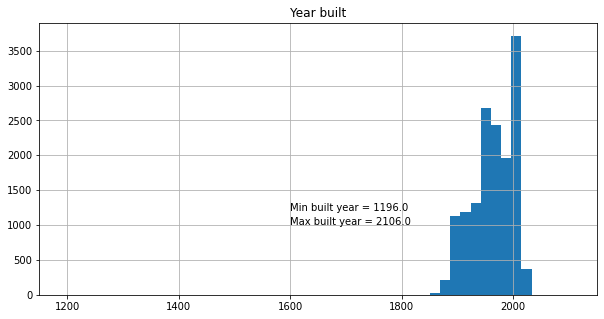

In [ ]:
#year built fueaters 
plt.figure(figsize=(10,5))
data.YearBuilt.hist(bins=50)

plt.text(x=1600, y = 1200, s='Min built year = {}'.format(data.YearBuilt.min()))
plt.text(x=1600, y = 1000, s='Max built year = {}'.format(data.YearBuilt.max()))
plt.title('Year built');

hahahah there is some houses from the futuers xD,to fix it :

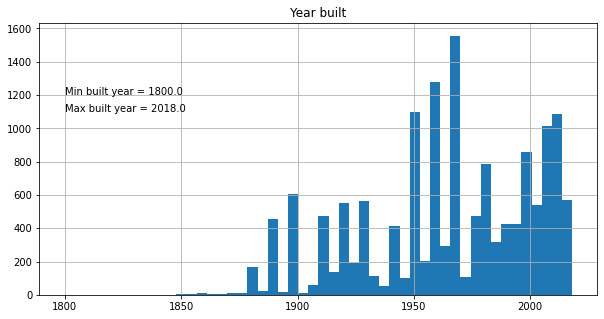

In [ ]:
data.loc[(data['YearBuilt'] < 1800) | (data['YearBuilt'] > 2018), 'YearBuilt'] = np.nan
#year built fueaters 
plt.figure(figsize=(10,5))
data.YearBuilt.hist(bins=50)

plt.text(x=1800, y = 1200, s='Min built year = {}'.format(data.YearBuilt.min()))
plt.text(x=1800, y = 1100, s='Max built year = {}'.format(data.YearBuilt.max()))
plt.title('Year built');

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33957 entries, 0 to 34853
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         33957 non-null  object        
 1   Rooms          33957 non-null  int64         
 2   Type           33957 non-null  object        
 3   Price          26567 non-null  float64       
 4   Method         33957 non-null  object        
 5   SellerG        33957 non-null  object        
 6   Date           33957 non-null  datetime64[ns]
 7   Distance       33957 non-null  float64       
 8   Postcode       33957 non-null  int64         
 9   Bedroom2       25743 non-null  float64       
 10  Bathroom       25734 non-null  float64       
 11  Car            25250 non-null  float64       
 12  Landsize       22179 non-null  float64       
 13  BuildingArea   13180 non-null  float64       
 14  YearBuilt      15014 non-null  float64       
 15  CouncilArea    3395

to deal with missing values in **Bathroom , Car , LandSize , BuildingAre,YearBuilt , BedRoom** let's build an ITERATIVE IMPUTER 

Iterative Imputer : Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.


In [ ]:
bathroomMin , bathroomMax = data['Bathroom'].min(),data['Bathroom'].max()
bedroomMin , bedroomMax = data['Bedroom2'].min(),data['Bedroom2'].max()
carMin , carMax = data['Car'].min(),data['Car'].max()
LSMin,LSMax=data['Landsize'].min(),data['Landsize'].max()
YBMin , YBMax=data['YearBuilt'].min(),data['YearBuilt'].max()
BAMin , BAMax = data['BuildingArea'].min(),data['BuildingArea'].max()
print("bath room MIN : {0}\nbath room MAX : {1}\n".format(bathroomMin,bathroomMax))
print("bed room MIN :{0}\nbath room MAX : {1}\n".format(bedroomMin,bedroomMax))
print("car MIN : {0}\ncar MAX : {1}\n".format(carMin,carMax))
print("Land size MIN : {0}\nLand size MAX : {1}\n".format(LSMin,LSMax))
print("Year Built MIN : {0}\nYear Built MAX : {1}\n".format(YBMin,YBMax))
print("Building Area MIN : {0}\nBuilding Area MAX : {1}\n".format(BAMin,BAMax))


bath room MIN : 0.0
bath room MAX : 6.0

bed room MIN :1.0
bath room MAX : 8.0

car MIN : 0.0
car MAX : 7.0

Land size MIN : 0.0
Land size MAX : 1218.0

Year Built MIN : 1800.0
Year Built MAX : 2018.0

Building Area MIN : 0.01
Building Area MAX : 464.0



OK , BathRoom BedRoom Car are in the same range ,so just impute them toghether .

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(sample_posterior=True,n_nearest_features=5,min_value=0,max_value=bedroomMax)

We don't need all the features of missing value prediction

In [ ]:
featuresList = data.columns.tolist()
colToRemove=['Price','Date','SellerG','CouncilArea','HouseNumber','Street','Regionname','Suburb','Landsize','YearBuilt','BuildingArea']
featuresList = [x for x in featuresList if x not in colToRemove]

In [ ]:
data.reset_index(drop=True, inplace=True)
xToImpute = data[featuresList].copy()
xToImpute.head()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
0,2,h,SS,2.5,3067,2.0,1.0,1.0,-37.8014,144.9958,4019.0
1,2,h,S,2.5,3067,2.0,1.0,1.0,-37.7996,144.9984,4019.0
2,2,h,S,2.5,3067,2.0,1.0,0.0,-37.8079,144.9934,4019.0
3,3,u,VB,2.5,3067,3.0,2.0,1.0,-37.8114,145.0116,4019.0
4,3,h,SP,2.5,3067,3.0,2.0,0.0,-37.8093,144.9944,4019.0


make one hot encoder manualy by get dummies function , cuz the one hot encoder that is sklearn provide us  works only with integer categorical features

In [ ]:
def oneHotEncoder(X, features):
    X_ohe = pd.get_dummies(data=X, columns=features)
    return X_ohe
xOHE = oneHotEncoder(xToImpute,features=['Type','Method'])
xOHE.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,2,2.5,3067,2.0,1.0,1.0,-37.8014,144.9958,4019.0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,2.5,3067,2.0,1.0,1.0,-37.7996,144.9984,4019.0,1,0,0,0,0,1,0,0,0,0,0,0
2,2,2.5,3067,2.0,1.0,0.0,-37.8079,144.9934,4019.0,1,0,0,0,0,1,0,0,0,0,0,0
3,3,2.5,3067,3.0,2.0,1.0,-37.8114,145.0116,4019.0,0,0,1,0,0,0,0,0,0,0,1,0
4,3,2.5,3067,3.0,2.0,0.0,-37.8093,144.9944,4019.0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
xOHE.reset_index(drop=True, inplace=True)
xImputed = imp.fit_transform(xOHE)

In [ ]:
imputedData = pd.DataFrame(data=xImputed,columns=xOHE.columns.tolist())
imputedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33957 entries, 0 to 33956
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          33957 non-null  float64
 1   Distance       33957 non-null  float64
 2   Postcode       33957 non-null  float64
 3   Bedroom2       33957 non-null  float64
 4   Bathroom       33957 non-null  float64
 5   Car            33957 non-null  float64
 6   Lattitude      33957 non-null  float64
 7   Longtitude     33957 non-null  float64
 8   Propertycount  33957 non-null  float64
 9   Type_h         33957 non-null  float64
 10  Type_t         33957 non-null  float64
 11  Type_u         33957 non-null  float64
 12  Method_PI      33957 non-null  float64
 13  Method_PN      33957 non-null  float64
 14  Method_S       33957 non-null  float64
 15  Method_SA      33957 non-null  float64
 16  Method_SN      33957 non-null  float64
 17  Method_SP      33957 non-null  float64
 18  Method

now impute LAND SIZE :

In [ ]:
imp = IterativeImputer(n_nearest_features=5,min_value=LSMin,max_value=LSMax)
imputedData['Landsize']=data['Landsize']
xImputed = imp.fit_transform(imputedData)
imputedData = pd.DataFrame(data=xImputed,columns=imputedData.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Year Built Impute :


In [ ]:
imp = IterativeImputer(n_nearest_features=5,min_value=YBMin,max_value=YBMax)
imputedData['YearBuilt']=data['YearBuilt']
xImputed = imp.fit_transform(imputedData)
imputedData = pd.DataFrame(data=xImputed,columns=imputedData.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Building Area Impute :

In [ ]:
imp = IterativeImputer(n_nearest_features=5,min_value=BAMin,max_value=BAMax)
imputedData['BuildingArea']=data['BuildingArea']
xImputed = imp.fit_transform(imputedData)
imputedData = pd.DataFrame(data=xImputed,columns=imputedData.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
uselessCol = ['Propertycount','Postcode','Bathroom','Bedroom2','Car','Landsize','YearBuilt','BuildingArea','Rooms','Distance','Lattitude','Longtitude']
cleanData = pd.concat([data.drop(uselessCol, axis=1), imputedData], axis=1)
cleanData.head()

,Suburb,Type,Price,Method,SellerG,Date,CouncilArea,Regionname,Street,HouseNumber,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Landsize,YearBuilt,BuildingArea
0,Abbotsford,h,NaN,SS,Jellis,2016-03-09,Yarra City Council,Northern Metropolitan,Studley,68,2.0,2.5,3067.0,2.0,1.0,1.0,-37.8014,144.9958,4019.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,126.0,1935.264407,78.815647
1,Abbotsford,h,1480000.0,S,Biggin,2016-03-12,Yarra City Council,Northern Metropolitan,Turner,85,2.0,2.5,3067.0,2.0,1.0,1.0,-37.7996,144.9984,4019.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,1935.386511,81.528226
2,Abbotsford,h,1035000.0,S,Biggin,2016-04-02,Yarra City Council,Northern Metropolitan,Bloomburg,25,2.0,2.5,3067.0,2.0,1.0,0.0,-37.8079,144.9934,4019.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,1900.000000,79.000000
3,Abbotsford,u,NaN,VB,Rounds,2016-04-02,Yarra City Council,Northern Metropolitan,Victoria,18/659,3.0,2.5,3067.0,3.0,2.0,1.0,-37.8114,145.0116,4019.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1967.287722,142.705557
4,Abbotsford,h,1465000.0,SP,Biggin,2017-04-03,Yarra City Council,Northern Metropolitan,Charles,5,3.0,2.5,3067.0,3.0,2.0,0.0,-37.8093,144.9944,4019.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,134.0,1900.000000,150.000000


finally,drop all the nan's in the target

In [ ]:
cleanData = cleanData[~cleanData['Price'].isnull()].reset_index()
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26567 entries, 0 to 26566
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          26567 non-null  int64         
 1   Suburb         26567 non-null  object        
 2   Type           26567 non-null  object        
 3   Price          26567 non-null  float64       
 4   Method         26567 non-null  object        
 5   SellerG        26567 non-null  object        
 6   Date           26567 non-null  datetime64[ns]
 7   CouncilArea    26567 non-null  object        
 8   Regionname     26567 non-null  object        
 9   Street         26567 non-null  object        
 10  HouseNumber    26567 non-null  object        
 11  Rooms          26567 non-null  float64       
 12  Distance       26567 non-null  float64       
 13  Postcode       26567 non-null  float64       
 14  Bedroom2       26567 non-null  float64       
 15  Bathroom       2656

In [ ]:
X = cleanData.drop('Price',axis=1)
y = cleanData['Price']
print("Data Shape : {0}\nTarget Shape : {1}".format(X.shape,y.shape))

Data Shape : (26567, 34)
Target Shape : (26567,)


# Visuliazation : 
first of all let's split our featuers to :

1-numerical feauters

2-categorical featuers

In [ ]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26567 entries, 0 to 26566
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          26567 non-null  int64         
 1   Suburb         26567 non-null  object        
 2   Type           26567 non-null  object        
 3   Price          26567 non-null  float64       
 4   Method         26567 non-null  object        
 5   SellerG        26567 non-null  object        
 6   Date           26567 non-null  datetime64[ns]
 7   CouncilArea    26567 non-null  object        
 8   Regionname     26567 non-null  object        
 9   Street         26567 non-null  object        
 10  HouseNumber    26567 non-null  object        
 11  Rooms          26567 non-null  float64       
 12  Distance       26567 non-null  float64       
 13  Postcode       26567 non-null  float64       
 14  Bedroom2       26567 non-null  float64       
 15  Bathroom       2656

In [ ]:
numericalFeatuers = ['Rooms','Distance', 'Propertycount', 
                      'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                      'BuildingArea', 'YearBuilt', 'HouseNumber','Postcode']
                      
categoricalFeatuers = ['Suburb', 'Address','Type', 'Method', 'SellerG','CouncilArea','Regionname']

**Numerical Featuers**

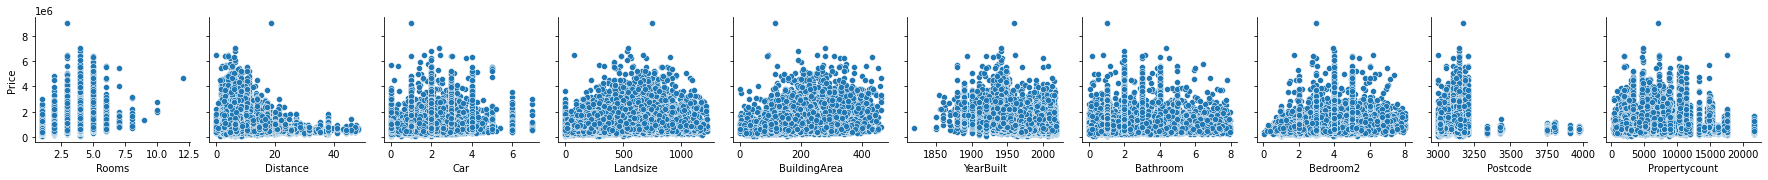

In [ ]:
sns.pairplot(data=cleanData[numericalFeatuers + ['Price']], 
             y_vars=['Price'], 
             x_vars=['Rooms',  'Distance',
                     'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Bathroom','Bedroom2','Postcode','Propertycount']);

from the plot above i see the POSTCODE featuer is useless.

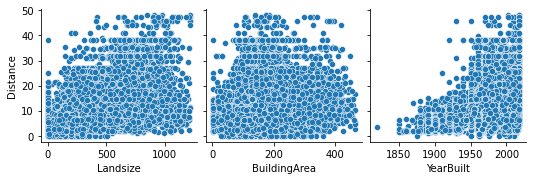

In [ ]:
sns.pairplot(data=cleanData[numericalFeatuers],y_vars=['Distance'],x_vars=['Landsize','BuildingArea','YearBuilt'])

It is clear that the goal is greatly affected by the distance from the CBD(The Sydney Central Business District)

From theese plots we can just conclude, that price is inversely proportional to the distance from CBD. More older buildings are closer to CBD.


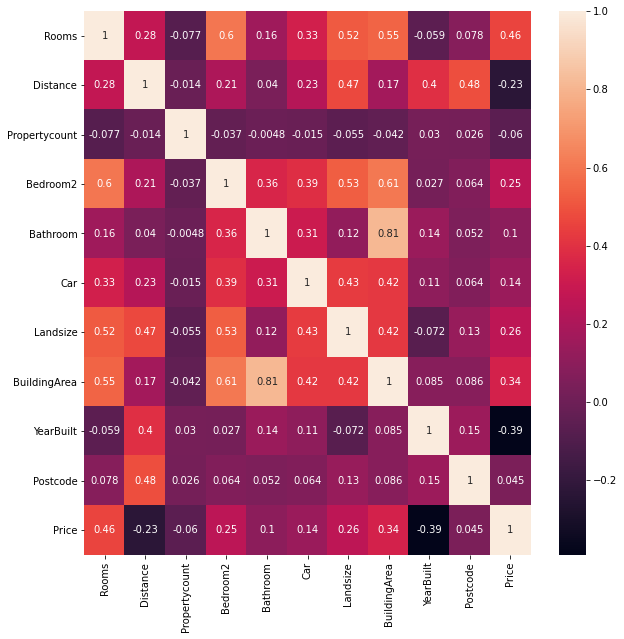

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cleanData[numericalFeatuers + ['Price']].corr(), annot=True)

1-rooms and bathrooms are too correlated to each other (0.97)

2-building area and (bathrooms,rooms,bed rooms) are correlated too (0.81,0.8,0.74)

3-Price is inversely correlated with Distance and YearBuilt ,and directly correlated with Building Area ,rooms and bedrooms

**Categorical Featuers**

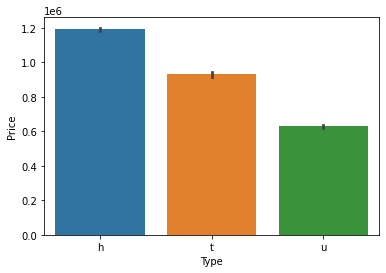

In [ ]:
sns.barplot(data=cleanData,x='Type',y='Price')

that's look good ,type h is the most expensive type
let's check the type featuers depending on region name

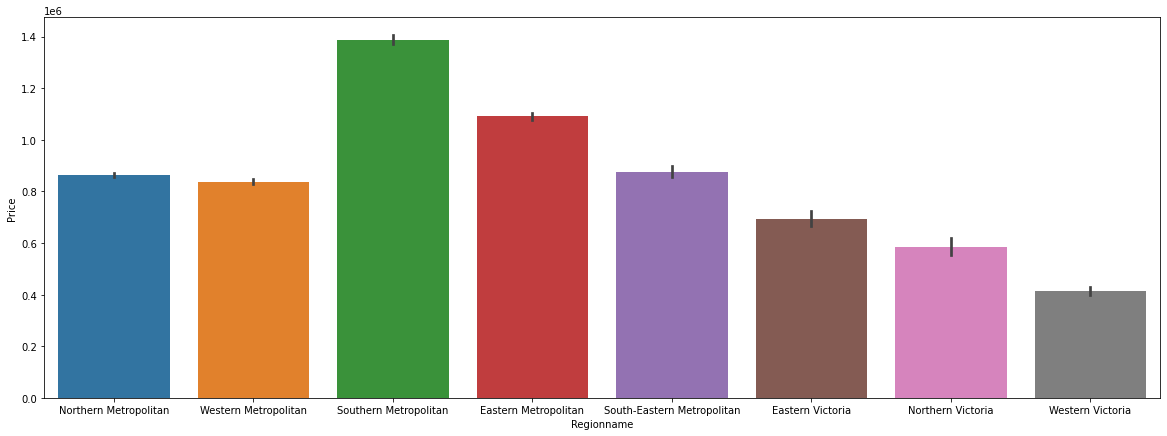

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=cleanData,x='Regionname',y='Price')
plt.show()

It is clear that area Southern Metropolitan is one of the most expensive areas

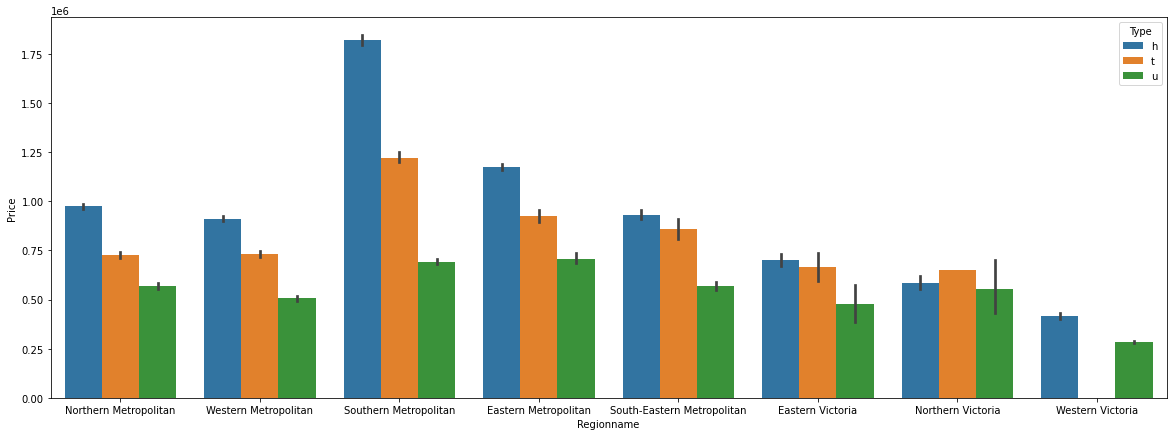

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=cleanData,x='Regionname',y='Price',hue='Type')
plt.show()

Let's visualize price distributions, grouped by Method and Type simultaneously. It allows to understand influence of buying Method on the house price in every Type:

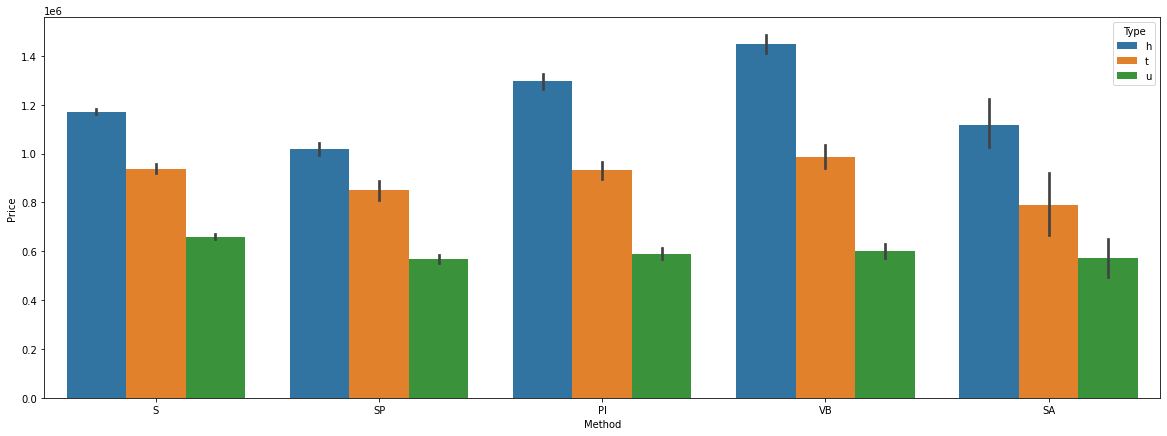

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=cleanData,x='Method',y='Price',hue='Type')
plt.show()

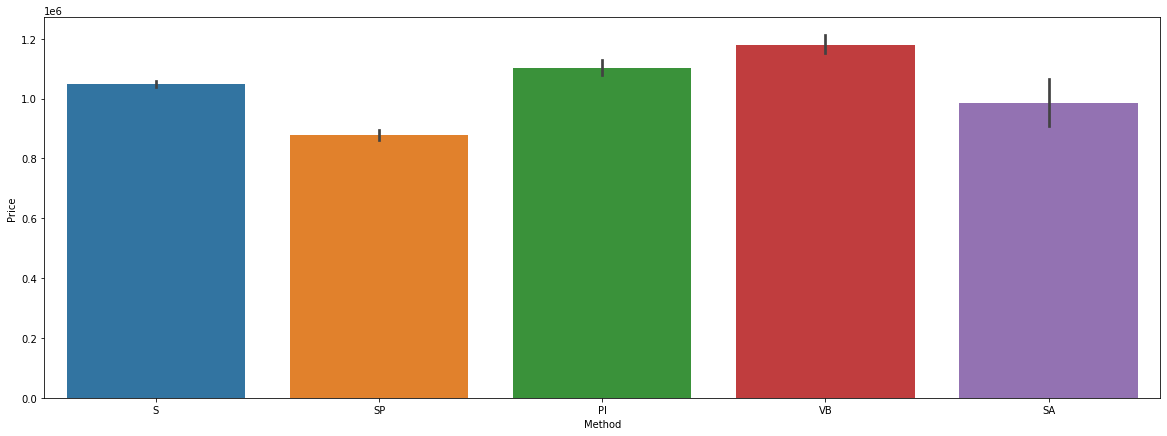

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=cleanData,x='Method',y='Price')
plt.show()

Nothing is clear here. There is a noticeable convergence between the values

what about ConcilArea

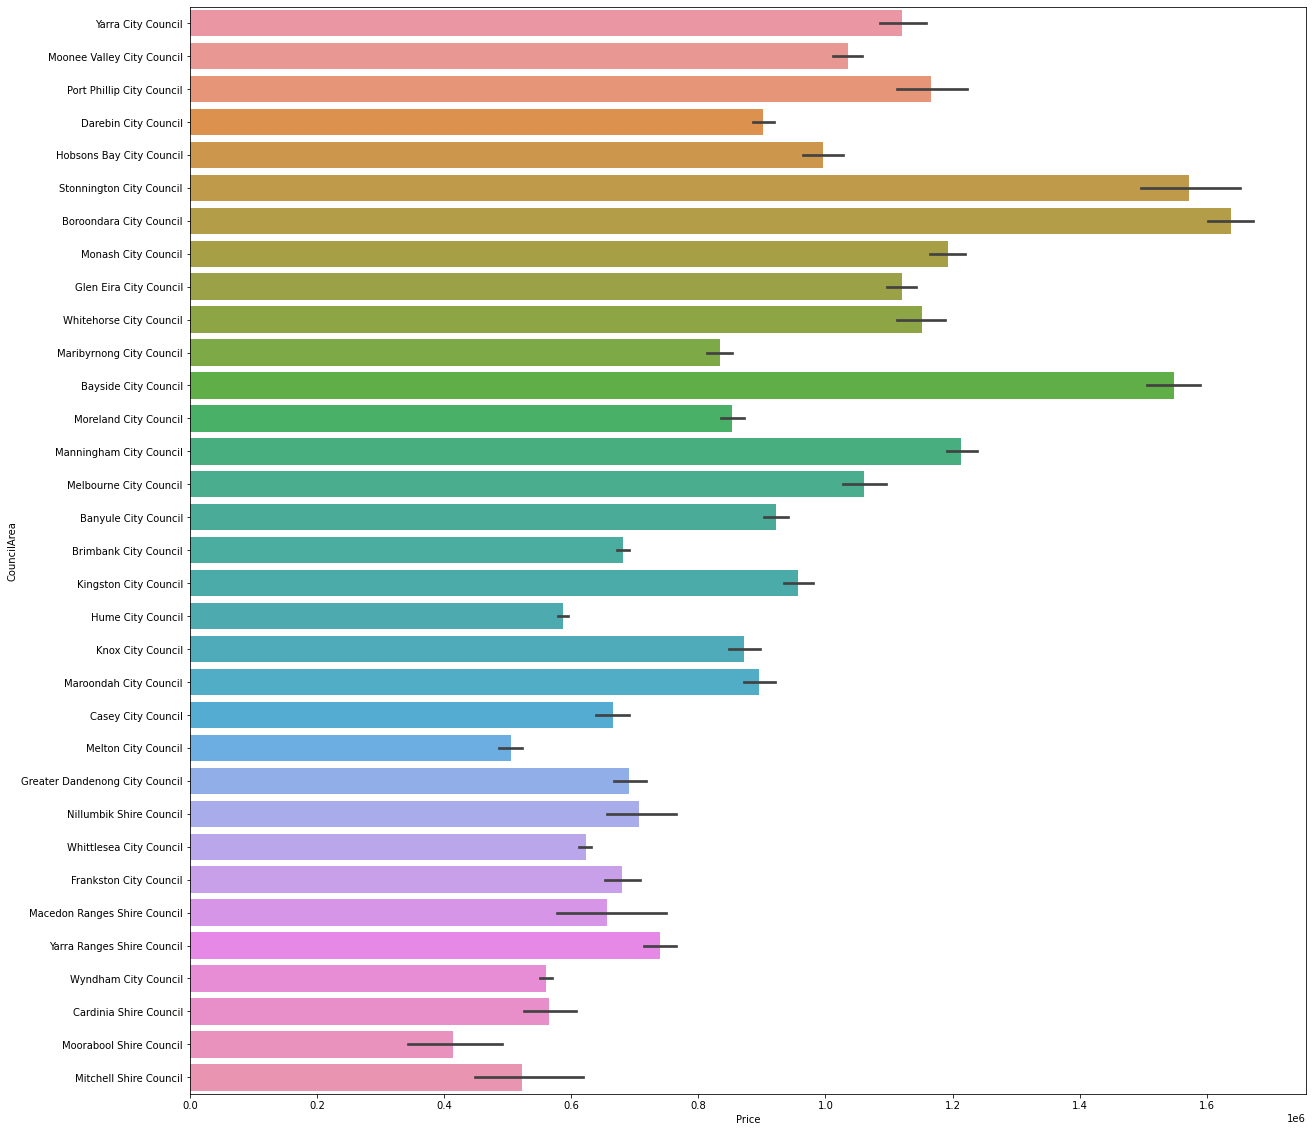

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(data=cleanData,x='Price',y='CouncilArea')
plt.show()

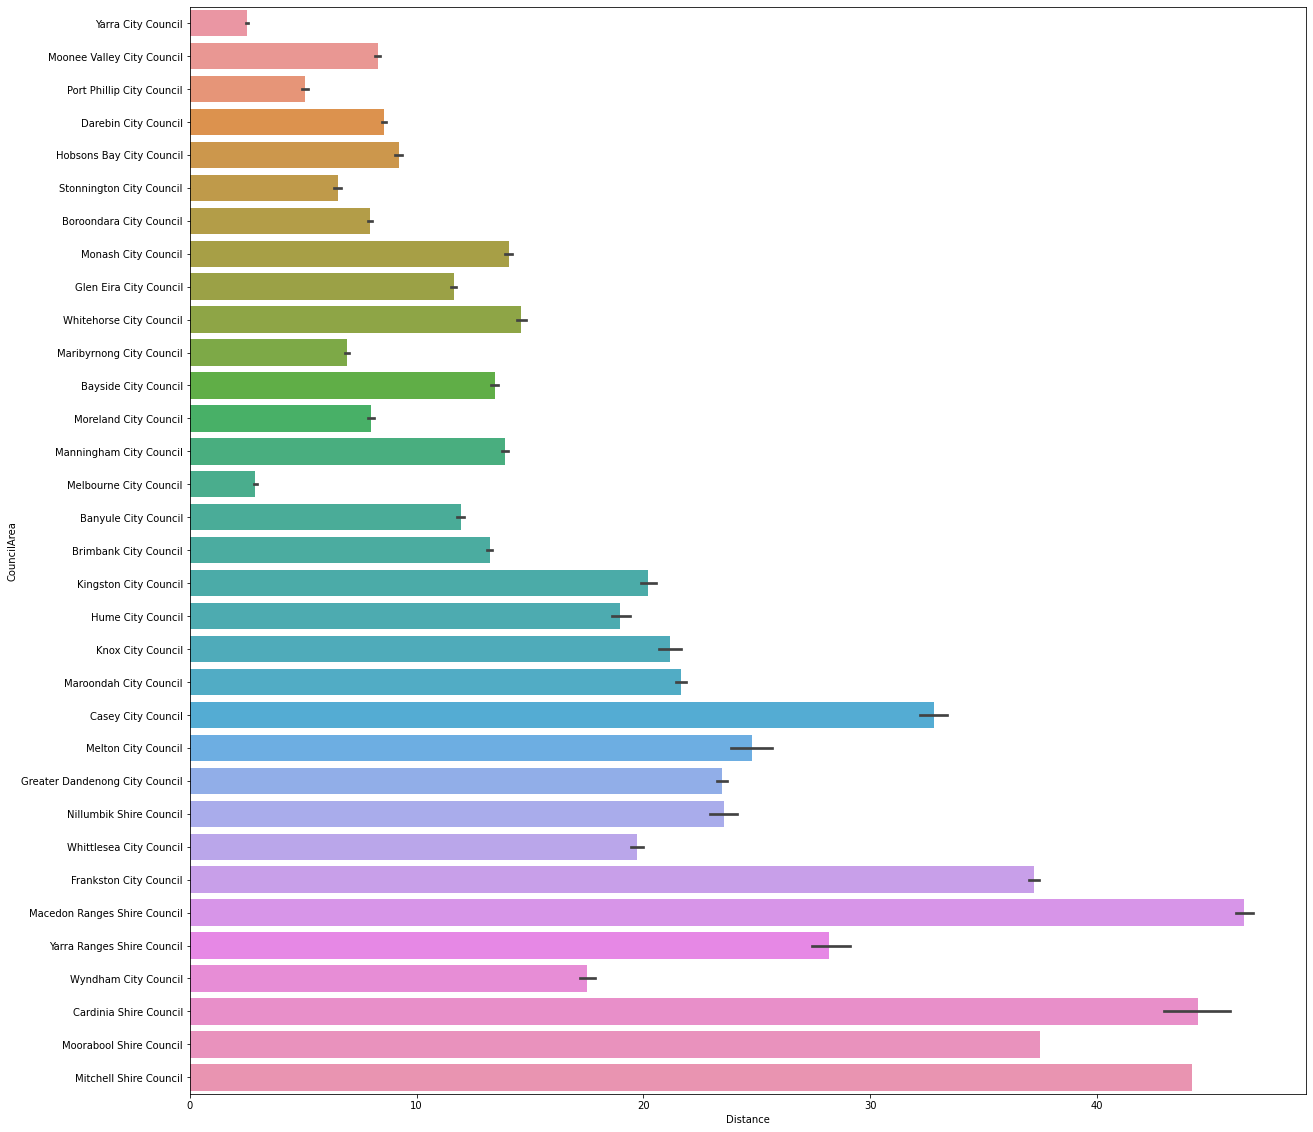

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(data=cleanData,x='Distance',y='CouncilArea')
plt.show()

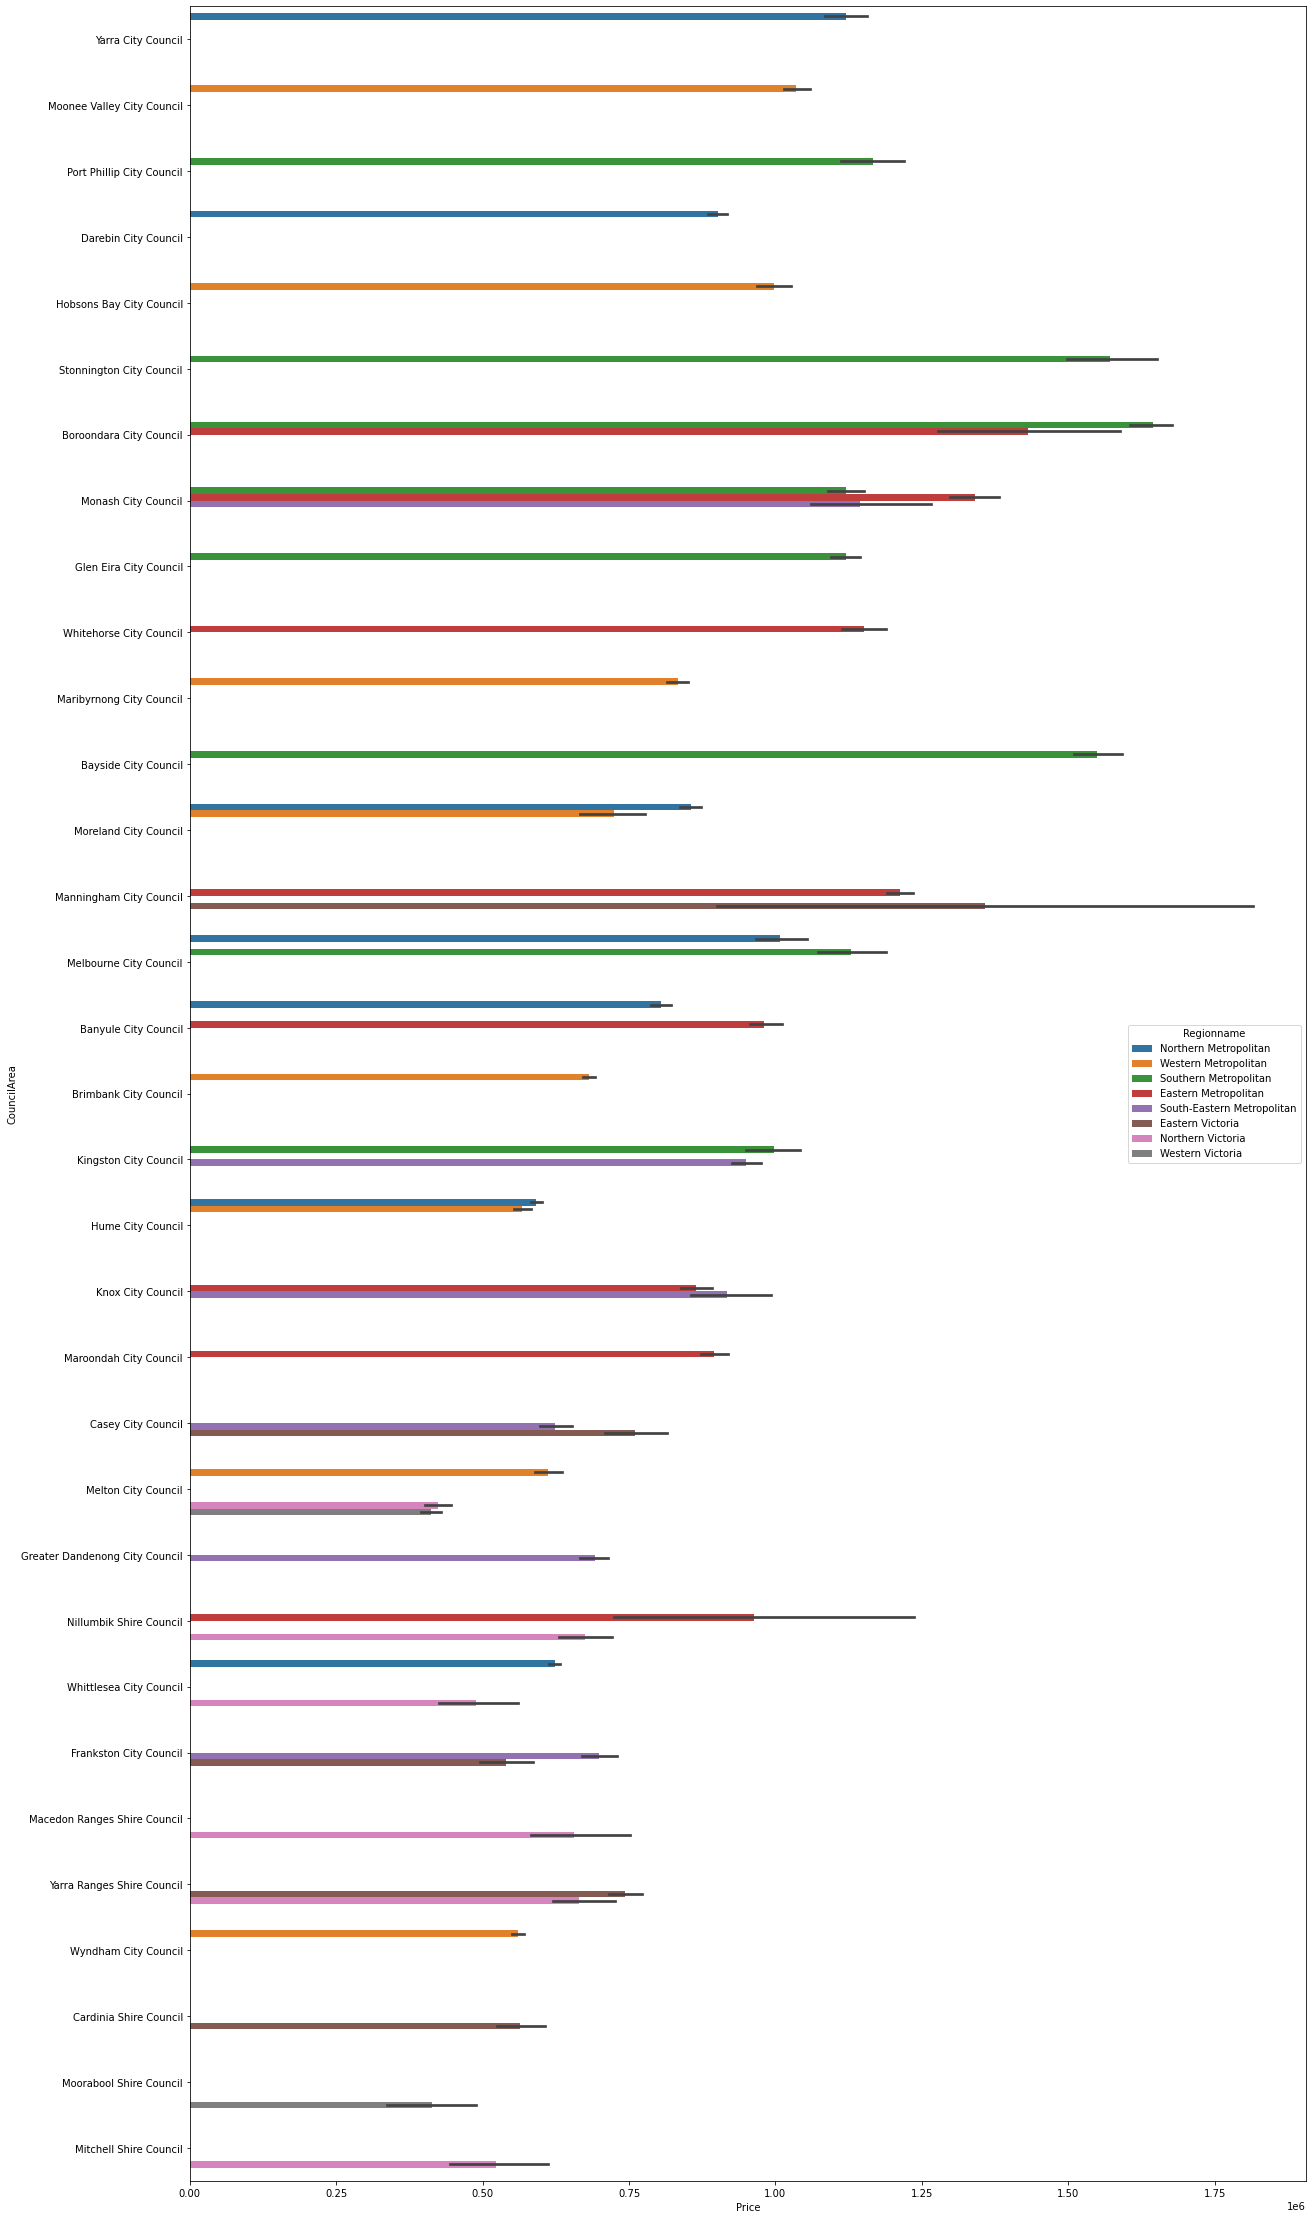

In [ ]:
plt.figure(figsize=(20,40))
sns.barplot(data=cleanData,x='Price',y='CouncilArea',hue='Regionname')
plt.show()

ok,let's try to group Region name and Conucil Area featuers and plot them to see the most expensive regions

In [ ]:
groupedData=cleanData.groupby(['Regionname','CouncilArea'])['Price','Longtitude','Lattitude'].median()
groupedData1=cleanData.groupby(['Regionname','CouncilArea'])['Distance','Longtitude','Lattitude'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


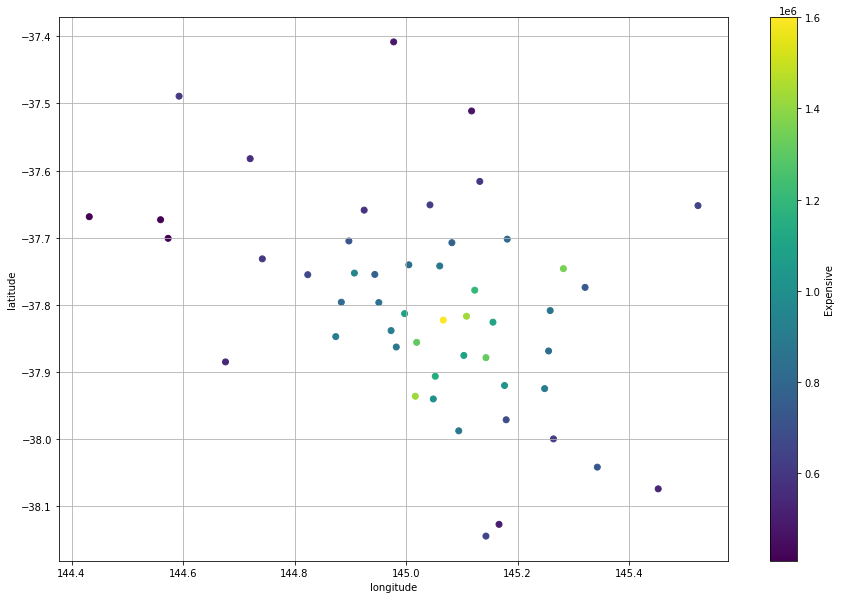

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=groupedData['Longtitude'],y=groupedData['Lattitude'],c=groupedData['Price'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Expensive')
plt.grid()
plt.show()

I think this graph is valuable, noting the gradation of colors from the areas near the capital, Sydney, to the farther areas

ok i will try the same thing with the distance featuer

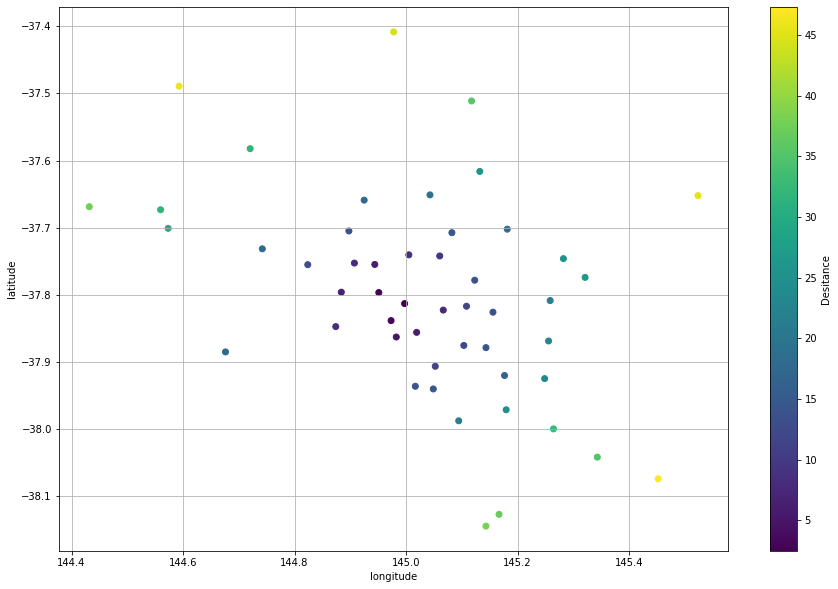

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=groupedData1['Longtitude'],y=groupedData1['Lattitude'],c=groupedData1['Distance'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Desitance')
plt.grid()
plt.show()

i have the same result,It is possible to extract a featuer from the two figures

# Featuers Engineering
as seen above :

There are some very important features in the target ,They are very useful in predicting the price of the house

Unlike some features related to the site and have nothing to do with the goal

**usefull featuers :**
Room , Bedroom , Bathroom , Car , Landsize , BuildingArea , Distance , Type , Method , RegionName , CouncilArea , yearBuilt

**useless featuers :**
SellerG , Suburb , Date , Adress , Street , HouseNumber , PostCode , Lattitude , Longtitude , propertycount , 



In [ ]:
#2 rows better to drop it xD
cleanData.drop([13884,19393],inplace=True)
cleanData.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


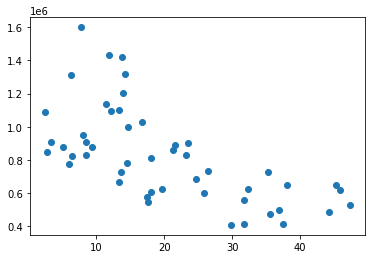

In [ ]:
c=cleanData.groupby(['Regionname','CouncilArea'])['Distance','Longtitude','Lattitude','Price'].median()
plt.scatter(x=c['Distance'],y=c['Price'])
plt.show()

In [ ]:
c

Distance  ...      Price
Regionname                 CouncilArea                               ...           
Eastern Metropolitan       Banyule City Council                 9.4  ...   880000.0
                           Boroondara City Council             11.8  ...  1431000.0
                           Knox City Council                   23.2  ...   830500.0
                           Manningham City Council             13.9  ...  1203000.0
                           Maroondah City Council              21.3  ...   860000.0
                           Monash City Council                 14.2  ...  1320000.0
                           Nillumbik Shire Council             18.0  ...   810000.0
                           Whitehorse City Council             13.4  ...  1100000.0
Eastern Victoria           Cardinia Shire Council              47.3  ...   531250.0
                           Casey City Council                  35.2  ...   730000.0
                           Frankston City Council              36.9  ...   500000.0
                           Yarra Ranges Shire Council          26.5  ...   735000.0
Northern Metropolitan      Banyule City Council                14.5  ...   780000.0
                           Darebin City Council                 8.4  ...   830000.0
                           Hume City Council                   17.4  ...   577750.0
                           Melbourne City Council               2.8  ...   850000.0
                           Moreland City Council                5.9  ...   775500.0
                           Whittlesea City Council             19.6  ...   625000.0
                           Yarra City Council                   2.5  ...  1089000.0
Northern Victoria          Macedon Ranges Shire Council        45.9  ...   616000.0
                           Melton City Council                 31.7  ...   411500.0
                           Mitchell Shire Council              44.2  ...   484000.0
                           Nillumbik Shire Council             25.9  ...   599000.0
                           Whittlesea City Council             35.5  ...   472500.0
                           Yarra Ranges Shire Council          45.2  ...   650000.0
South-Eastern Metropolitan Casey City Council                  32.3  ...   622000.0
                           Frankston City Council              38.0  ...   650000.0
                           Greater Dandenong City Council      24.7  ...   685000.0
                           Kingston City Council               21.5  ...   887500.0
                           Knox City Council                   23.5  ...   905000.0
                           Monash City Council                 16.7  ...  1030000.0
Southern Metropolitan      Bayside City Council                13.7  ...  1422500.0
                           Boroondara City Council              7.8  ...  1600000.0
                           Glen Eira City Council              11.4  ...  1137750.0
                           Kingston City Council               14.6  ...  1000000.0
                           Melbourne City Council               3.3  ...   908000.0
                           Monash City Council                 12.2  ...  1093800.0
                           Port Phillip City Council            5.1  ...   879250.0
                           Stonnington City Council             6.2  ...  1310000.0
Western Metropolitan       Brimbank City Council               13.3  ...   665000.0
                           Hobsons Bay City Council             8.4  ...   905500.0
                           Hume City Council                   31.7  ...   560000.0
                           Maribyrnong City Council             6.4  ...   823000.0
                           Melton City Council                 18.0  ...   608500.0
                           Moonee Valley City Council           8.0  ...   950000.0
                           Moreland City Council               13.6  ...   724500.0
                           

from all the information above i can define a method manually to calculate the StarsNumber for the house and add it to the DATA as new Featuer:

the new featuer values it's like the hotel Stars (more STARS more service)

In [ ]:
def starsNum(x):
  if ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Banyule City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Boroondara City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Manningham City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Monash City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Whitehorse City Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Yarra City Council')) or ((x['Regionname'] == 'Southern Metropolitan') and (x['CouncilArea'] !='Port Phillip City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Hobsons Bay City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Moonee Valley City Council')) :
    return 5
  elif ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Knox City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Maroondah City Council')) or ((x['Regionname'] == 'Eastern Metropolitan') and (x['CouncilArea']=='Nillumbik Shire Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Darebin City Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Melbourne City Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Moreland City Council')) or ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Knox City Council')) or ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Monash City Council')) or ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Kingston City Council')) or ((x['Regionname'] == 'Southern Metropolitan') and (x['CouncilArea']=='Port Phillip City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Maribyrnong City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Moreland City Council')):
    return 4
  elif ((x['Regionname'] == 'Eastern Victoria') and (x['CouncilArea']=='Yarra Ranges Shire Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Banyule City Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Hume City Council')) or ((x['Regionname'] == 'Northern Metropolitan') and (x['CouncilArea']=='Whittlesea City Council')) or ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Greater Dandenong City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Brimbank City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Melton City Council')) or  ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Wyndham City Council')) :
    return 3
  elif ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Casey City Council')) or ((x['Regionname'] == 'South-Eastern Metropolitan') and (x['CouncilArea']=='Frankston City Council')) or ((x['Regionname'] == 'Western Metropolitan') and (x['CouncilArea']=='Hume City Council')) or ((x['Regionname'] == 'Eastern Victoria') and (x['CouncilArea']=='Casey City Council')) or ((x['Regionname'] == 'Northern Victoria') and (x['CouncilArea'] =='Nillumbik Shire Council')) :
    return 2
  elif ((x['Regionname'] == 'Northern Victoria') and (x['CouncilArea'] !='Nillumbik Shire Council')) or ((x['Regionname'] == 'Western Victoria')) or ((x['Regionname'] == 'Eastern Victoria') and (x['CouncilArea'] =='Cardinia Shire Council')) or ((x['Regionname'] == 'Eastern Victoria') and (x['CouncilArea'] =='Frankston City Council')):
    return 1 

In [ ]:
cleanData['StarsNumber']=cleanData.apply (lambda row: starsNum(row), axis=1)

In [ ]:
cleanData['StarsNumber'].value_counts()

5    13159
4     8400
3     4195
2      588
1      223
Name: StarsNumber, dtype: int64

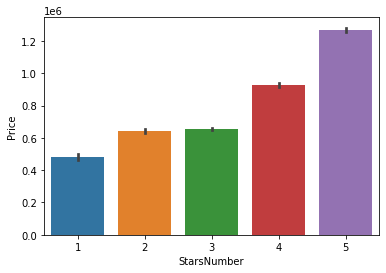

In [ ]:
sns.barplot(x='StarsNumber',y='Price',data=cleanData)

In [ ]:
cleanData.drop(['SellerG','Suburb','Date','Street','HouseNumber','index','Postcode','Lattitude','Longtitude','Propertycount',
                'Type','Method'],axis=1,inplace=True)
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26565 entries, 0 to 26564
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       26565 non-null  int64  
 1   Price         26565 non-null  float64
 2   CouncilArea   26565 non-null  object 
 3   Regionname    26565 non-null  object 
 4   Rooms         26565 non-null  float64
 5   Distance      26565 non-null  float64
 6   Bedroom2      26565 non-null  float64
 7   Bathroom      26565 non-null  float64
 8   Car           26565 non-null  float64
 9   Type_h        26565 non-null  float64
 10  Type_t        26565 non-null  float64
 11  Type_u        26565 non-null  float64
 12  Method_PI     26565 non-null  float64
 13  Method_PN     26565 non-null  float64
 14  Method_S      26565 non-null  float64
 15  Method_SA     26565 non-null  float64
 16  Method_SN     26565 non-null  float64
 17  Method_SP     26565 non-null  float64
 18  Method_SS     26565 non-nu

In [ ]:
data = oneHotEncoder(cleanData ,features=['CouncilArea','Regionname'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26565 entries, 0 to 26564
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   level_0                                     26565 non-null  int64  
 1   Price                                       26565 non-null  float64
 2   Rooms                                       26565 non-null  float64
 3   Distance                                    26565 non-null  float64
 4   Bedroom2                                    26565 non-null  float64
 5   Bathroom                                    26565 non-null  float64
 6   Car                                         26565 non-null  float64
 7   Type_h                                      26565 non-null  float64
 8   Type_t                                      26565 non-null  float64
 9   Type_u                                      26565 non-null  float64
 10  Method_PI 

Uniform the data type

In [ ]:
data = data.astype(int)


Define functions to convert the target value into the normal distepution
as we explain on the EDA section

In [ ]:
def toLog(y):
    return np.log(1 + y)

In [ ]:
def fromLog(y):
    return np.exp(y) - 1

In [ ]:
#split the data into TRAIN , TEST data
X = data.loc[:,'Rooms':]
y=data['Price']
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(X,y,test_size=0.3,random_state=42)

last step in this section(featuers enginereeing),apply lasso regression for featuers selection wich is minimize the sum of the absolute values of the coefficients.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler , RobustScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

rScaler = RobustScaler()
mmScaler = MinMaxScaler()
xTrainScaled= rScaler.fit_transform(xTrain)



lasso = Lasso(random_state=42)
lassoPara = {'alpha':[0.001,0.1,1,10,100]}
gs = GridSearchCV(lasso,lassoPara,cv=KFold())
gs.fit(xTrainScaled,toLog(yTrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso = Lasso(alpha=0.001,max_iter=1000).fit(xTrainScaled,toLog(yTrain))

In [ ]:
xTestScaled = rScaler.fit_transform(xTest)

print('Non-zero features: {}'
     .format(np.sum(lasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(lasso.score(xTrainScaled, toLog(yTrain))))
print('R-squared score (test): {:.3f}\n'
     .format(lasso.score(xTestScaled, toLog(yTest))))
print('Features with non-zero weight (sorted by absolute magnitude):')
uselessCol1=[]
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
    else :
      uselessCol1.append(e[0])

Non-zero features: 37
R-squared score (training): 0.739
R-squared score (test): 0.725

Features with non-zero weight (sorted by absolute magnitude):
	Rooms, 0.392
	Type_u, -0.322
	CouncilArea_Wyndham City Council, -0.245
	CouncilArea_Bayside City Council, 0.223
	Regionname_Western Metropolitan, -0.211
	Distance, -0.206
	CouncilArea_Hume City Council, -0.190
	Regionname_Northern Metropolitan, -0.161
	CouncilArea_Brimbank City Council, -0.148
	CouncilArea_Melton City Council, -0.145
	CouncilArea_Stonnington City Council, 0.139
	CouncilArea_Boroondara City Council, 0.136
	BuildingArea, 0.135
	CouncilArea_Banyule City Council, -0.114
	CouncilArea_Frankston City Council, 0.102
	CouncilArea_Whittlesea City Council, -0.091
	YearBuilt, -0.082
	Bedroom2, -0.074
	Type_h, 0.065
	CouncilArea_Yarra City Council, 0.064
	Regionname_South-Eastern Metropolitan, 0.064
	Landsize, 0.063
	CouncilArea_Moreland City Council, -0.059
	StarsNumber, 0.058
	CouncilArea_Maribyrnong City Council, -0.055
	Method_S, 

drop the unnecessery columns in the data depending on lasso result.

In [ ]:
finalData = data.drop(uselessCol1,axis=1,inplace=False)
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26565 entries, 0 to 26564
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   level_0                                 26565 non-null  int64
 1   Price                                   26565 non-null  int64
 2   Rooms                                   26565 non-null  int64
 3   Distance                                26565 non-null  int64
 4   Bedroom2                                26565 non-null  int64
 5   Bathroom                                26565 non-null  int64
 6   Car                                     26565 non-null  int64
 7   Type_h                                  26565 non-null  int64
 8   Type_u                                  26565 non-null  int64
 9   Method_PI                               26565 non-null  int64
 10  Method_S                                26565 non-null  int64
 11  Method_VB      

# Cross-Validation and hyperparameter tuning


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import  RandomForestRegressor

#prepare the data
X=finalData.loc[:,'Rooms':]
y=finalData['Price']
xTrain , xTest , yTrain , yTest = train_test_split(X,y,test_size=0.3,random_state=42)
xTrain.shape , xTest.shape, yTrain.shape,yTest.shape

((18595, 37), (7970, 37), (18595,), (7970,))

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
import numpy as np

xScaled = rScaler.fit_transform(xTrain)
xTestScaled = rScaler.fit_transform(xTest)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
polyXTrain = pf.fit_transform(xScaled)
polyXTest = pf.fit_transform(xTestScaled)

For Ridge Regression :

Train Score :[0.853748   0.84954169 0.82686603]
Validation Score : [0.82294897 0.82373225 0.81240197]


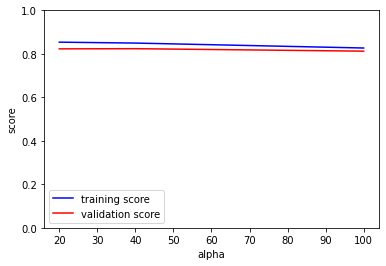

In [ ]:
trainScore , valScore = validation_curve(Ridge(),polyXTrain,toLog(yTrain),'alpha',[50,100,1000],scoring='r2')

plt.plot([20,40,100], np.median(trainScore, 1), color='blue', label='training score')
plt.plot([20,40,100], np.median(valScore, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('score')
print("Train Score :{0}\nValidation Score : {1}".format(np.median(trainScore, 1),np.median(valScore, 1)))

training Score : 84%     , validation Score : 82% 

for 100 alpha value.



Extreme gradient boosting :

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import validation_curve
import numpy as np
para = {'n_estimators':[200,250,275],'max_depth':[4,5,6,7,8]}
GS = GridSearchCV(XGBRegressor(),para,cv=7)
GS.fit(xScaled,toLog(yTrain))

[20:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=7, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 250, 275]},
             pre_d

In [ ]:
GS.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
GS.best_estimator_.score(xScaled,toLog(yTrain)),GS.best_estimator_.score(xTestScaled,toLog(yTest))

(0.8951738852873735, 0.8274421836547571)

Random Forest :

Train Score :[0.84787726 0.8478754  0.8482071  0.84818398 0.84815856]
Validation Score : [0.79630338 0.79696696 0.79742837 0.79703051 0.79709176]


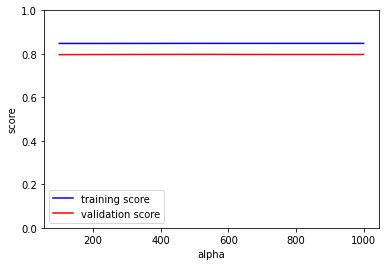

In [ ]:
from sklearn.ensemble import RandomForestRegressor

trainScore , valScore = validation_curve(RandomForestRegressor(max_depth=9),xTrain,toLog(yTrain),'n_estimators',[100,250,500,750,1000],cv=KFold())

plt.plot([100,250,500,750,1000], np.median(trainScore, 1), color='blue', label='training score')
plt.plot([100,250,500,750,1000], np.median(valScore, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('score')
print("Train Score :{0}\nValidation Score : {1}".format(np.median(trainScore, 1),np.median(valScore, 1)))

# Model Evaluate and Plotting :
for evaluate MAE will be our choice,Because Big errors on houses with huge price will not distort MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from xgboost import XGBRegressor
ridgeModel = Ridge(alpha=100)
ridgeModel.fit(polyXTrain,toLog(yTrain))

xgbModel = XGBRegressor(n_estimators=250,max_depth=6)
xgbModel.fit(xScaled,toLog(yTrain))

[19:59:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
yPredict_ridge = fromLog(ridgeModel.predict(polyXTest))
yTrainPredict_ridge = fromLog(ridgeModel.predict(polyXTrain))

yTrainPredict_XGB = fromLog(xgbModel.predict(xScaled))
yPredict_XGB = fromLog(xgbModel.predict(xTestScaled))

In [ ]:
mae(yPredict_ridge,yTest),mae(yTrainPredict_ridge,yTrain)

(181055.32520007616, 168460.5113769064)

In [ ]:
mae(yPredict_XGB,yTest),mae(yTrainPredict_XGB,yTrain)

(174750.29090730866, 135763.66999109305)

**Ridge** :

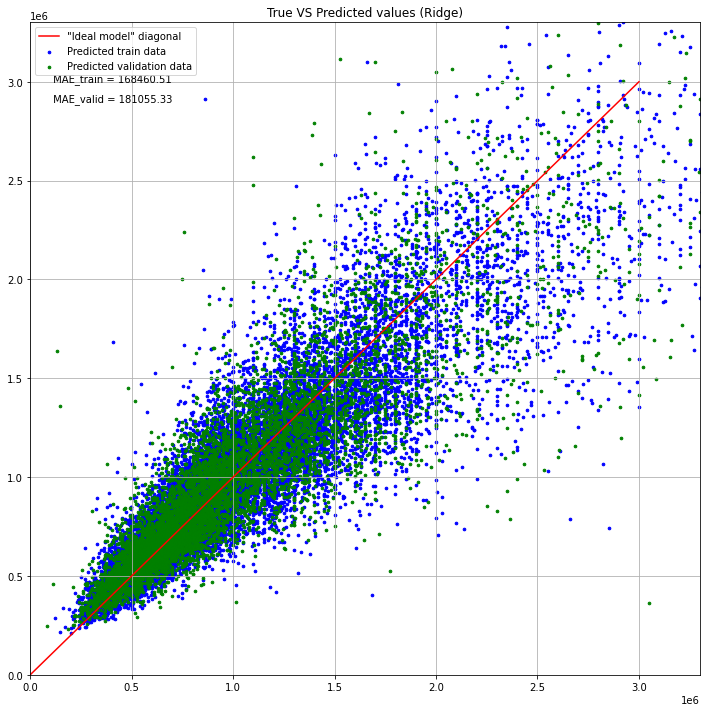

In [ ]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=yTrainPredict_ridge,  x=yTrain, c='blue', s=7)
plt.scatter(y=yPredict_ridge,  x=yTest, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(yTrainPredict_ridge,yTrain)), x=1e5, y=3e6)
plt.text(s=" MAE_valid = {0:.2f}".format(mae(yPredict_ridge,yTest)),  x=1e5, y=2.9e6)
plt.title("True VS Predicted values (Ridge)")
plt.grid()

notice that the big error values is in the huge house price

**XGB**:

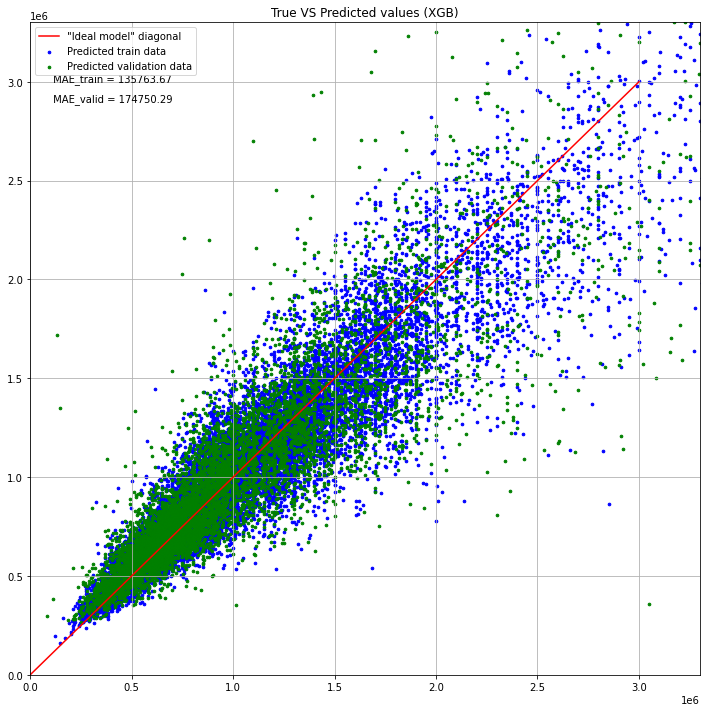

In [ ]:
plt.figure(figsize=(12,12))
plt.xlim((0, y.quantile(0.99)))
plt.ylim((0, y.quantile(0.99)))
plt.scatter(y=yTrainPredict_XGB,  x=yTrain, c='blue', s=7)
plt.scatter(y=yPredict_XGB,  x=yTest, c='green', s=7)
plt.plot([0,3e6],[0, 3e6], 'r-')
plt.legend(['"Ideal model" diagonal','Predicted train data','Predicted validation data'])
plt.text(s=" MAE_train = {0:.2f}".format(mae(yTrainPredict_XGB,yTrain)), x=1e5, y=3e6)
plt.text(s=" MAE_valid = {0:.2f}".format(mae(yPredict_XGB,yTest)),  x=1e5, y=2.9e6)
plt.title("True VS Predicted values (XGB)")
plt.grid()